In [1]:
import boto3
from sagemaker.predictor import Predictor
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import CSVDeserializer
from sagemaker.session import Session
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydantic/_internal/_fields.py:201: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


[04/15/25 21:11:15] INFO     Found credentials in shared credentials file: ~/.aws/credentials   ]8;id=932710;file:///Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=887268;file:///Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/botocore/credentials.py#1352\1352]8;;\

sagemaker.config INFO - Not applying SDK defaults from location: /Library/Application Support/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /Users/manraj/Library/Application Support/sagemaker/config.yaml


In [2]:
endpoint_name = 'sagemaker-scikit-learn-2025-04-16-03-57-33-651'

boto_session = boto3.Session(region_name='ca-central-1')
sagemaker_session = Session(boto_session=boto_session)

predictor = Predictor(
    endpoint_name=endpoint_name,
    sagemaker_session=sagemaker_session,
    serializer=CSVSerializer(),
    deserializer=CSVDeserializer()
)

[04/15/25 21:11:19] INFO     Found credentials in shared credentials file: ~/.aws/credentials   ]8;id=80651;file:///Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=101089;file:///Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/botocore/credentials.py#1352\1352]8;;\

Test 1

In [3]:
csv_file_path = '/Users/manraj/Documents/GitHub/Dana-4830/HVAC_Test_Data_Files/hvac_test.csv'
with open(csv_file_path, 'r') as file:
    csv_data = file.read()

result = predictor.predict(csv_data)
print("Predictions:")
print(result)

Predictions:
[['Predicted_HVAC_kWh'], ['-0.09174354187602107'], ['3.9120071056391352'], ['3.137175181411598'], ['2.966215058042277'], ['-0.11315997674233036'], ['3.0042134049680187'], ['2.8470372272090687'], ['2.8244327539119487'], ['-0.14287483855908123'], ['2.9517269434932683'], ['2.8550756104811086'], ['2.7893357040904867'], ['-0.07010931953152011'], ['2.918200936427664'], ['2.734903422250066'], ['2.7488925130702073'], ['-0.11584084365026959'], ['2.86484113154028'], ['2.733579205700158'], ['2.90497906716871'], ['0.1801117371240275'], ['3.028146998662656'], ['2.9271651197857143'], ['2.918699497977115'], ['0.16863090712157103'], ['2.9433605470230026'], ['2.819047500842749'], ['2.7659206877762874'], ['0.07863626930630563'], ['2.7595400548479603'], ['2.3827292102700337'], ['2.5123513947868865'], ['0.03604726215447751'], ['2.5136448240826073'], ['2.3049221248619975'], ['2.310756800069243'], ['-0.15524340755057886'], ['3.3684540147141933'], ['2.917948149294052'], ['2.8565903680105995'], [

Predictions DataFrame:


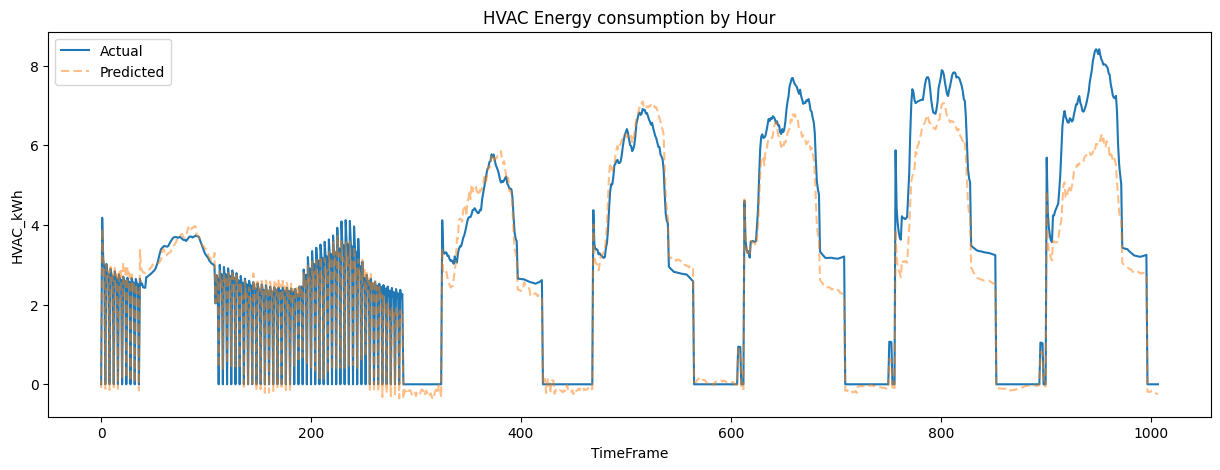

In [4]:
df = pd.read_csv('/Users/manraj/Documents/GitHub/Dana-4830/HVAC_Test_Data_Files/hvac_test_actual_1.csv')

df.columns = df.columns.str.replace(r"^b'|'$|\[.*?\]", "", regex=True)
df = df.loc[df['Environment:Site Day Type Index'] != 0]
df["HVAC_kWh"] = df["Electricity:HVAC"] * 2.77778e-7
df.drop(columns='Electricity:HVAC', axis=1, inplace=True)

df_predictions = pd.DataFrame(result[1:], columns=result[0])
df_predictions['Predicted_HVAC_kWh'] = df_predictions['Predicted_HVAC_kWh'].astype(float)
print("Predictions DataFrame:")

plt.figure(figsize=(15, 5))
sns.lineplot(x=df.index, y=df['HVAC_kWh'], label='Actual')
sns.lineplot(x=df_predictions.index, y=df_predictions['Predicted_HVAC_kWh'], label='Predicted', dashes=(4,2), alpha=0.5)
plt.title('HVAC Energy consumption by Hour')
plt.xlabel('TimeFrame')
plt.legend()
plt.show()

Test 2

In [5]:
csv_file_path = '/Users/manraj/Documents/GitHub/Dana-4830/HVAC_Test_Data_Files/hvac_test1.csv'
with open(csv_file_path, 'r') as file:
    csv_data = file.read()

result = predictor.predict(csv_data)
print("Predictions:")
print(result)

Predictions:
[['Predicted_HVAC_kWh'], ['-0.2571263668178041'], ['3.7900726658867976'], ['2.9059279527633737'], ['2.633081427712216'], ['-0.26026583180725904'], ['2.8729584815008566'], ['2.4809118482675374'], ['2.4616465337085045'], ['-0.2989898146520278'], ['2.6638647815327166'], ['2.331856753955919'], ['2.2919882137729526'], ['-0.2857713186687798'], ['2.570166700268817'], ['2.2960009575886535'], ['2.3216599551415493'], ['-0.27337502674729697'], ['2.6157448672604477'], ['2.3368984613482024'], ['2.264855963284066'], ['-0.3260449592561816'], ['2.452232347037892'], ['2.1564644941330906'], ['2.148760744275972'], ['-0.3375480766150951'], ['2.4161255609337786'], ['2.1740506074952326'], ['2.182916879003788'], ['-0.2742779753382236'], ['2.4461742176741224'], ['2.2030743756515996'], ['2.0979433848511393'], ['-0.11673720683800393'], ['2.3471987322477688'], ['2.2403697634444004'], ['2.265727129793191'], ['-0.21182162753930722'], ['2.99282588736364'], ['2.544763189498208'], ['2.545722953649526'], 

Predictions DataFrame:


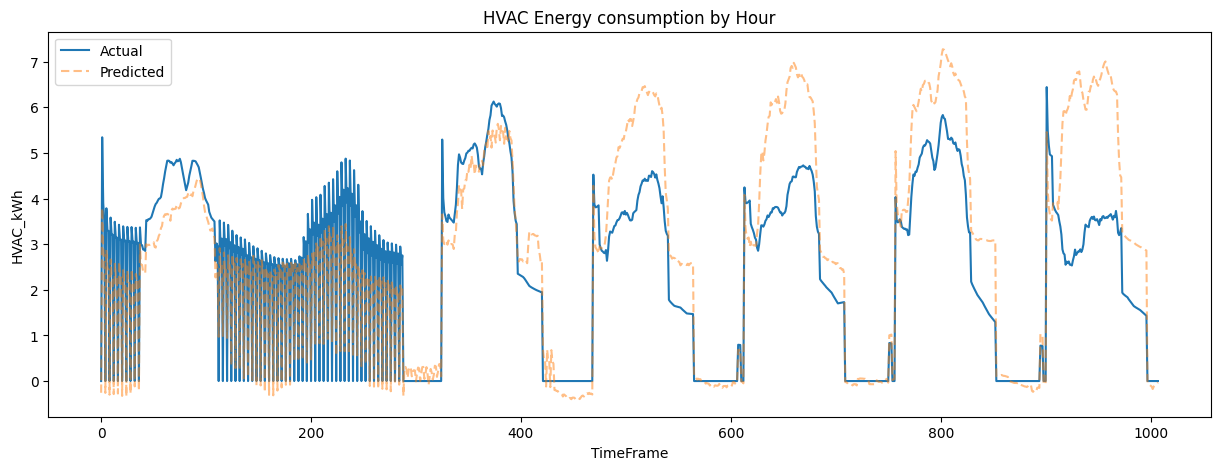

In [6]:
df = pd.read_csv('/Users/manraj/Documents/GitHub/Dana-4830/HVAC_Test_Data_Files/hvac_test_actual_2.csv')

df.columns = df.columns.str.replace(r"^b'|'$|\[.*?\]", "", regex=True)
df = df.loc[df['Environment:Site Day Type Index'] != 0]
df["HVAC_kWh"] = df["Electricity:HVAC"] * 2.77778e-7
df.drop(columns='Electricity:HVAC', axis=1, inplace=True)

df_predictions = pd.DataFrame(result[1:], columns=result[0])
df_predictions['Predicted_HVAC_kWh'] = df_predictions['Predicted_HVAC_kWh'].astype(float)
print("Predictions DataFrame:")

plt.figure(figsize=(15, 5))
sns.lineplot(x=df.index, y=df['HVAC_kWh'], label='Actual')
sns.lineplot(x=df_predictions.index, y=df_predictions['Predicted_HVAC_kWh'], label='Predicted', dashes=(4,2), alpha=0.5)
plt.title('HVAC Energy consumption by Hour')
plt.xlabel('TimeFrame')
plt.legend()
plt.show()

Test with online

In [21]:
region = 'ca-central-1'
s3_bucket = 'dana-minicapstone-ca'
s3_incoming_key = 'incoming/hvac_test.csv'
s3_prediction_key = 'predictions/hvac_test.csv'
s3 = boto3.client('s3', region_name=region)

response_incoming = s3.get_object(Bucket=s3_bucket, Key=s3_incoming_key)
response_prediction = s3.get_object(Bucket=s3_bucket, Key=s3_prediction_key)

In [22]:
df = pd.read_csv(response_incoming['Body'])
df_predictions = pd.read_csv(response_prediction['Body'])

In [23]:
n_predictions = len(df_predictions)
df = df.tail(n_predictions)
df.reset_index(drop=True, inplace=True)

In [24]:
df.columns = df.columns.str.replace(r"^b'|'$|\[.*?\]", "", regex=True)
df = df.loc[df['Environment:Site Day Type Index'] != 0]
df["HVAC_kWh"] = df["Electricity:HVAC"] * 2.77778e-7
df.drop(columns='Electricity:HVAC', axis=1, inplace=True)

df_predictions['Predicted_HVAC_kWh'] = df_predictions['Predicted_HVAC_kWh'].astype(float)

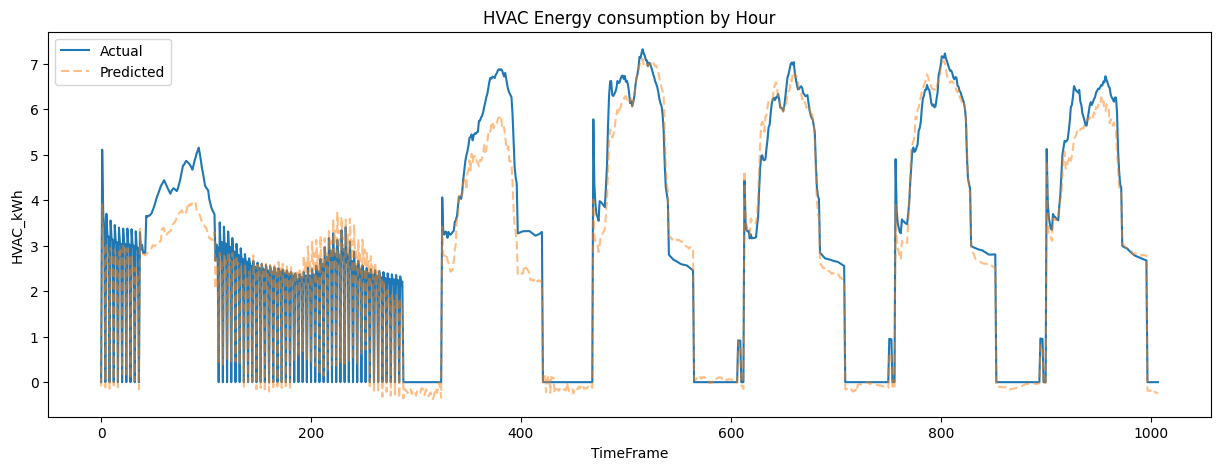

In [25]:
plt.figure(figsize=(15, 5))
sns.lineplot(x=df.index, y=df['HVAC_kWh'], label='Actual')
sns.lineplot(x=df_predictions.index, y=df_predictions['Predicted_HVAC_kWh'], label='Predicted', dashes=(4,2), alpha=0.5)
plt.title('HVAC Energy consumption by Hour')
plt.xlabel('TimeFrame')
plt.legend()
plt.show()